In [2]:
import pandas as pd
df =pd.read_csv("SpotifyFeatures.csv")

print(df.head())
print(df.info())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [4]:
print(df.isnull().sum())
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
0


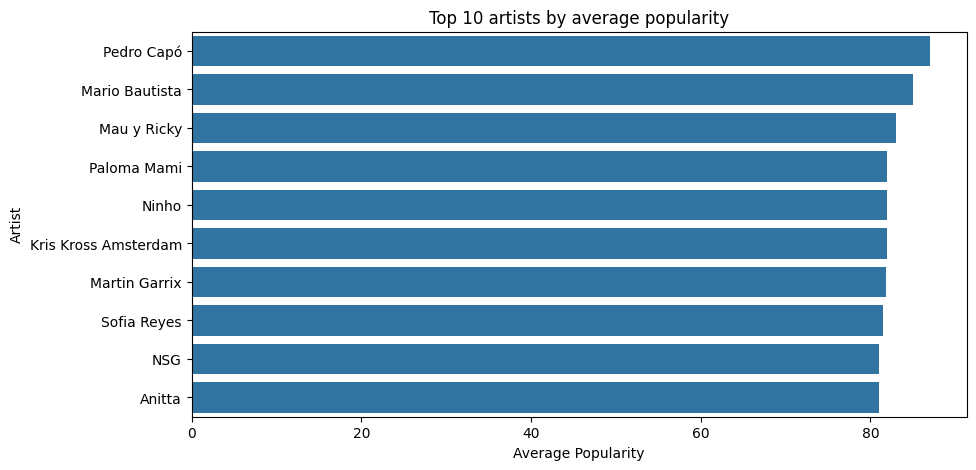

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists=df.groupby("artist_name")["popularity"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 artists by average popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_18128\1125963592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette="viridis")


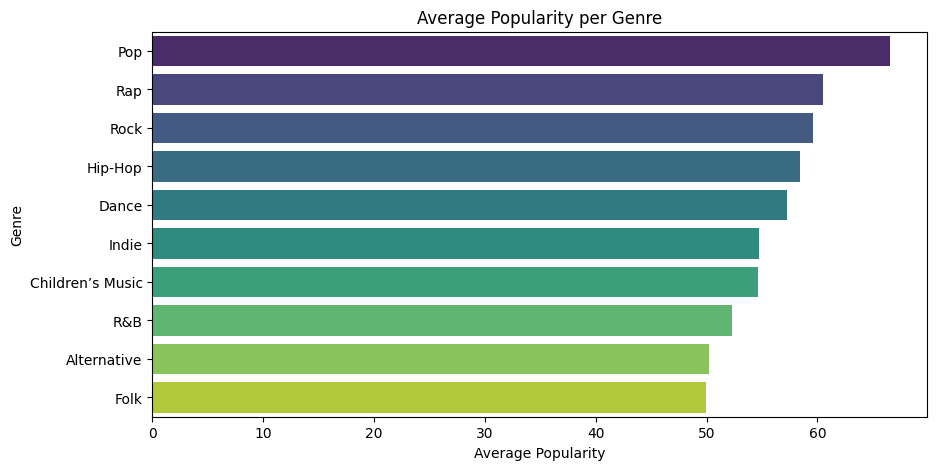

In [7]:
# Average popularity per genre
genre_popularity = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).head(10)

# Visualize
plt.figure(figsize=(10,5))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette="viridis")
plt.title("Average Popularity per Genre")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.show()

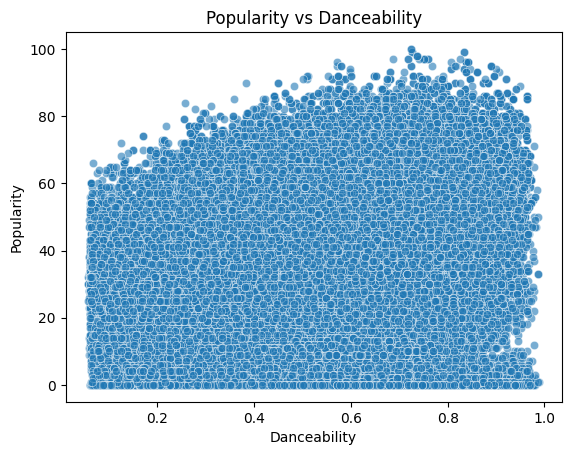

In [8]:
#Relationship b/w Popularity and Danceability
plt.Figure(figsize=(8,5))
sns.scatterplot(data=df,x="danceability",y="popularity",alpha=0.6)
plt.title("Popularity vs Danceability")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

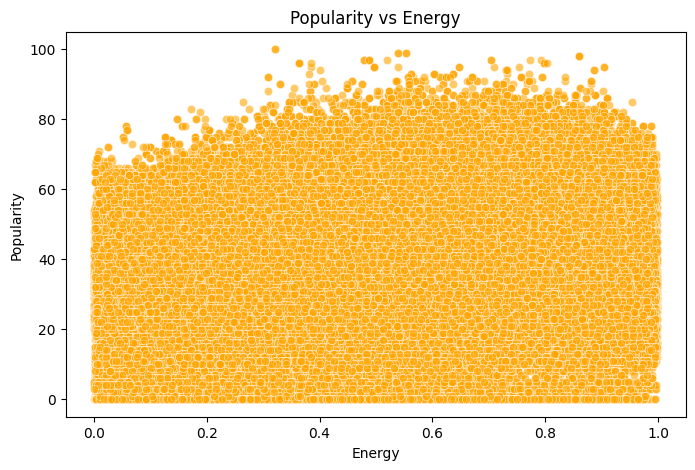

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="energy", y="popularity", alpha=0.6, color="orange")
plt.title("Popularity vs Energy")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()


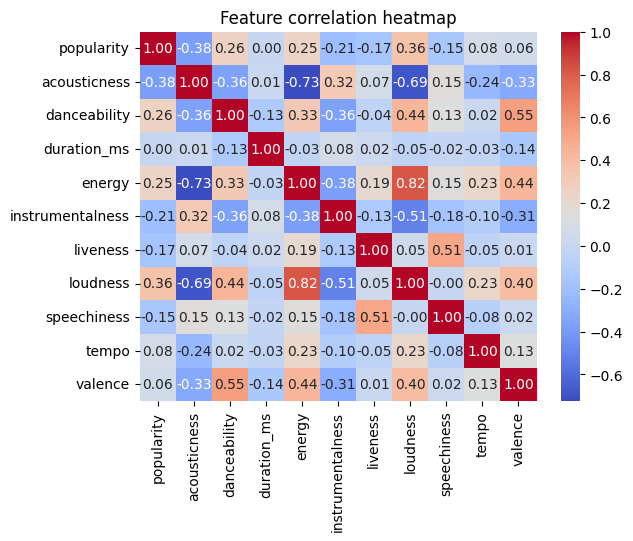

In [10]:
plt.Figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature correlation heatmap")
plt.show()

In [ ]:
# Most popular songs
print("Most Popular Songs:")
print(df.nlargest(5, "popularity")[["artist_name", "track_name", "popularity"]])

# Least popular songs
print("\n Least Popular Songs:")
print(df.nsmallest(5, "popularity")[["artist_name", "track_name", "popularity"]])


🎵 Most Popular Songs:
          artist_name                                track_name  popularity
9027    Ariana Grande                                   7 rings         100
107804  Ariana Grande                                   7 rings         100
9026    Ariana Grande  break up with your girlfriend, i'm bored          99
86951     Post Malone                                      Wow.          99
107802  Ariana Grande  break up with your girlfriend, i'm bored          99

🕳️ Least Popular Songs:
          artist_name                                         track_name  \
0      Henri Salvador                        C'est beau de faire un Show   
3      Henri Salvador                     Dis-moi Monsieur Gordon Cooper   
5      Henri Salvador                     Le petit souper aux chandelles   
8              Chorus                                              Helka   
10  Leopold Stokowski  Symphony No.4 In E Minor Op.98 : IV. Allegro E...   

    popularity  
0            0  
3     

C:\Users\anike\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


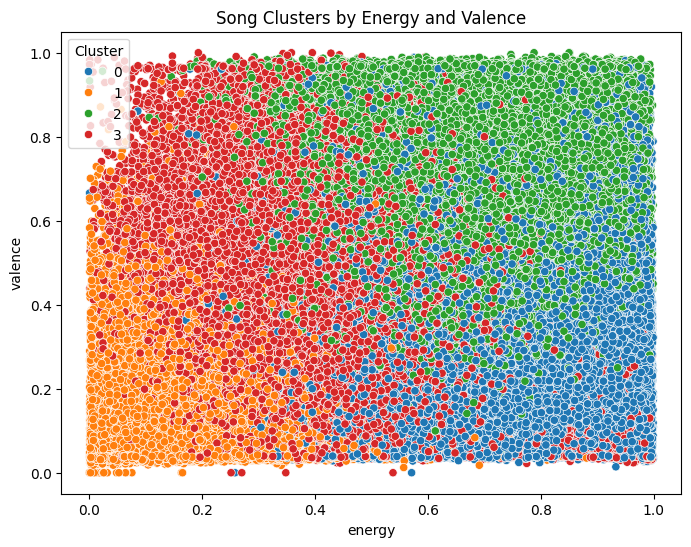

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[["danceability", "energy", "acousticness", "valence", "tempo"]]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy", y="valence", hue="Cluster", palette="tab10")
plt.title("Song Clusters by Energy and Valence")
plt.show()


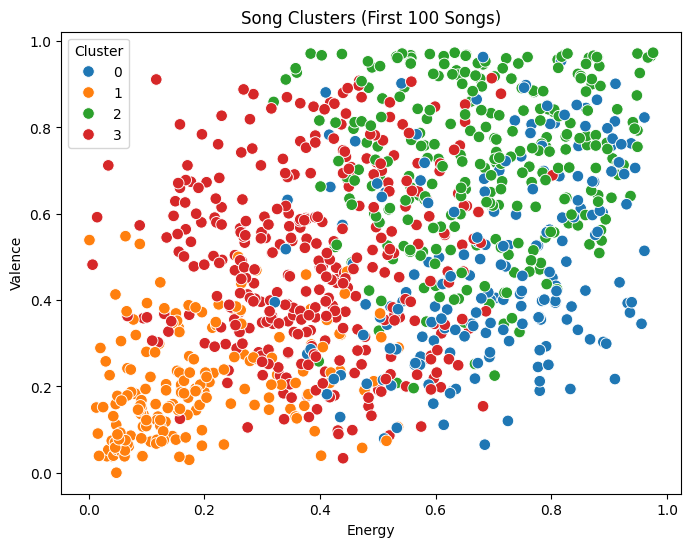

In [ ]:
# Take only first 100 rows from your existing clustered dataframe
sample_df = df.head(1000)

# Visualize clusters for 1000 songs
plt.figure(figsize=(8,6))
sns.scatterplot(data=sample_df, x="energy", y="valence", hue="Cluster", palette="tab10", s=70)
plt.title("Song Clusters (First 100 Songs)")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select features & target
X = df[["danceability", "energy", "acousticness", "valence", "tempo"]]
y = df["popularity"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Check accuracy
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

# Feature importance
importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
importance.sort_values(by="Coefficient", ascending=False, inplace=True)
print(importance)


R² Score: 0.18492393554239084
        Feature  Coefficient
0  danceability    21.912914
4         tempo     0.010564
1        energy    -0.909608
3       valence   -12.354714
2  acousticness   -18.583410


C:\Users\anike\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


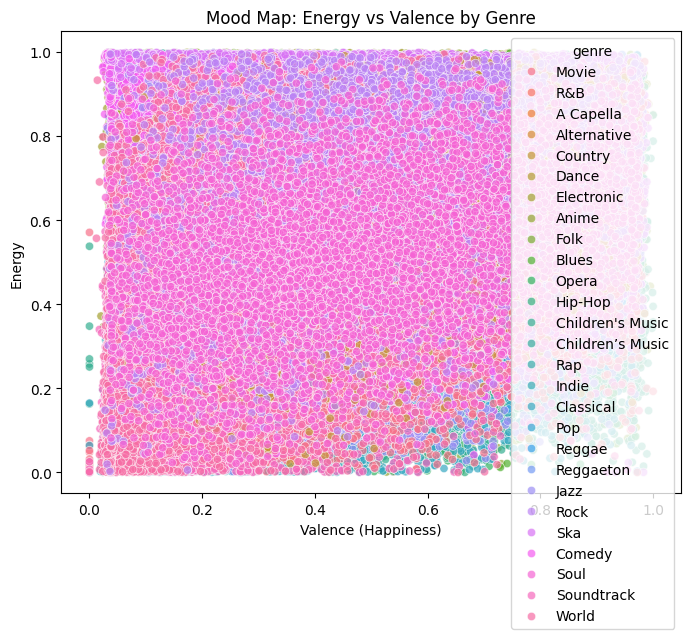

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="valence", y="energy", hue="genre", alpha=0.7)
plt.title("Mood Map: Energy vs Valence by Genre")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Energy")
plt.show()
